# 8-8 여자친구 선물 고르기

In [1]:
import os
import sys
import math
import time
import json

# A compendium of commonly-used regular expressions.
import re

# The fundamental package for scientific computing with Python.
import numpy as np

# Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more
import pandas as pd

# A Fast, Extensible Progress Bar for Python and CLI
from tqdm import tqdm

In [2]:
# Statistical data visualization using matplotlib.
import seaborn as sns

# matplotlib: plotting with Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Set the matplotlib color cycle using a seaborn palette.
sns.set_palette('pastel')

# plot outputs appear and be stored within the notebook.
%matplotlib inline

# A module for finding, managing, and using fonts across platforms.
mpl.font_manager._rebuild()
sorted([f.name for f in mpl.font_manager.fontManager.ttflist if f.name.startswith('Malgun')])

if sys.platform.startswith('darwin'):
    mpl.rc('font', family='AppleGothic')
elif sys.platform.startswith('win32'):
    mpl.rc('font', family='Malgun Gothic')

mpl.rc('axes', unicode_minus=False)

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Korean, the 13th most widely spoken language in the world, is a beautiful, yet complex language. Myriad Korean NLP engines were built by numerous researchers, to computationally extract meaningful features from the labyrinthine text.
import konlpy
from konlpy.corpus import kobill
from konlpy.tag import Okt, Kkma, Hannanum
from konlpy.tag import Twitter; t = Twitter()

In [4]:
import nltk

In [5]:
# data
df = pd.read_csv('./data/kin.csv')
df.index = np.arange(0, len(df))

print(df.shape)
df.head()

(248, 4)


,docId,title,content,href
0,374420755,여자친구 선물,여자친구 선물 고르실때쿠팡 참고하시면 좋습니다.​가격도 저렴한 상품이 많고생각 못했...,https://kin.naver.com/qna/detail.nhn?d1id=8&di...
1,374420755,여자친구 선물,어머낰!!그러시지 말고 차라리 마카롱을 직접 만들어 드리는 것은 어떨까요?감동일것 ...,https://kin.naver.com/qna/detail.nhn?d1id=8&di...
2,374420755,여자친구 선물,세상에 단 하나 뿐인 거라면 주문제작아이템이 좋죠1만원대 이하로 저렴하게 만들 수 ...,https://kin.naver.com/qna/detail.nhn?d1id=8&di...
3,374420755,여자친구 선물,​20대 여자 생일선물 추천 - 추천하는 선물 BEST (ver.5만원 이하)안녕하...,https://kin.naver.com/qna/detail.nhn?d1id=8&di...
4,374420755,여자친구 선물,안녕하세요 여자친구 선물이 고민이시군요 ^^먼저 아름다운 사랑을 응원합니다저도 여자...,https://kin.naver.com/qna/detail.nhn?d1id=8&di...


In [6]:
contents = []
for i in tqdm(df.index):
    contents.append(df['content'][i])
contents = ' '.join(contents)

100%|██████████| 248/248 [00:00<00:00, 3638.44it/s]


## 명사 추출하기

In [7]:
okt = Okt()
tokens = okt.nouns(contents)
tokens[:10]

['여자친구', '선물', '때', '쿠팡', '참고', '가격', '상품', '생각', '아이디어', '상품']

In [8]:
# 영문자, 숫자 제거
txts = []

for token in tokens:
    txt = re.sub('[a-zA-Z0-9]', '', token)
    txts.append(txt)

txts[:10]

['여자친구', '선물', '때', '쿠팡', '참고', '가격', '상품', '생각', '아이디어', '상품']

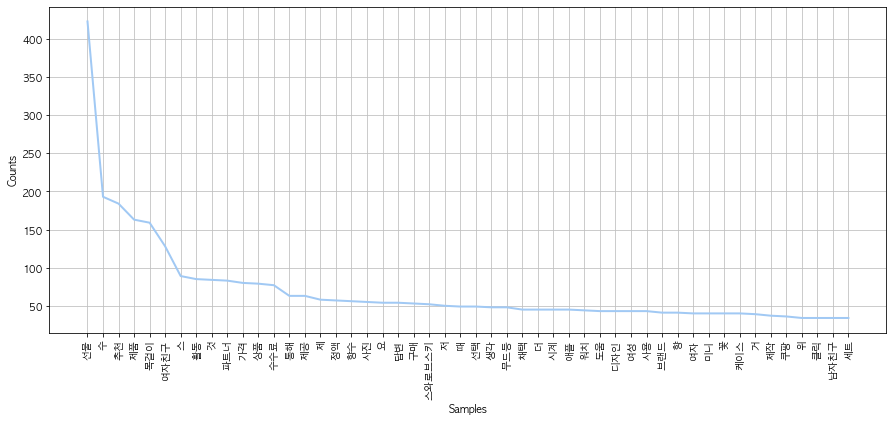

In [9]:
gf = nltk.Text(txts, name='여친 선물')
plt.figure(figsize=(15,6))
gf.plot(50)
plt.show()

In [10]:
stop_words = [
    '선물','추천','것','가격','여친','제품','여자친구','제','요','더','고급',
    '판매','때','참고','하나','해','한번','제작','용','준','디자인','거','네이버','사람',
    '배송','중','정말','후기','감동'
    '커플','가능','저','사랑','생각','사용','개','세대','인기','상품','직접','브랜드',
    '선택','곳','모양','마감','요즘','오늘','가지','남녀','그냥','위','페이',
    '마음','부담','남자','협찬','전','핸드','의미','변경','도움','색상','아래','포장',
    '처','조금',
    '하루','정도','처리','보시','심플','가장','여성','때문','정보',
    '독서','주소','쇼핑','링크','이니셜','기념일',
    '헤어','질문','친구','스토어','아주','할인',
    '스','이면','남','지금','센스',
    '정액'
]
txts = [word for word in txts if word not in stop_words]
txts[:10]

['쿠팡', '아이디어', '이벤트', '수', '이주', '때뭘', '비교', '쿠팡', '최저', '검색']

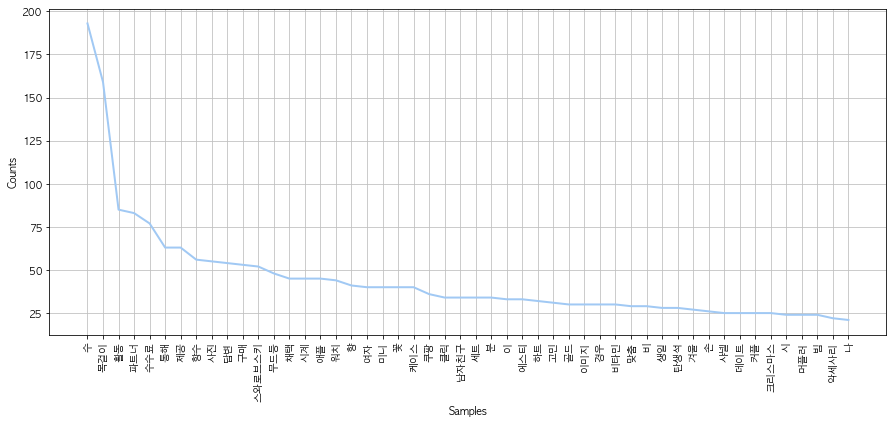

In [11]:
gf = nltk.Text(txts, name='여친 선물')
plt.figure(figsize=(15,6))
gf.plot(50)
plt.show()

## 워드 크라우드

In [12]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [14]:
font_path = None

if sys.platform.startswith('darwin'):
    font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
elif sys.platform.startswith('win32'):
    font_path = 'c:/Windows/Fonts/malgun.ttf'

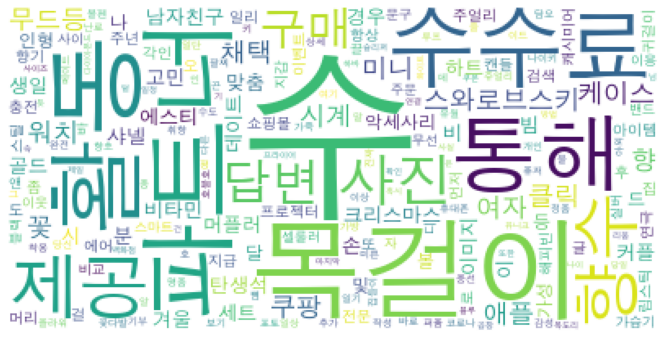

In [15]:
data = gf.vocab().most_common(300)

wordcloud = WordCloud(
    font_path=font_path,
    relative_scaling=0.2,
    background_color='white',
).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
mask = np.array(Image.open('./data/heart.jpg'))

wordcloud = WordCloud(
    font_path=font_path,
    relative_scaling=0.3, 
    mask=mask,
    background_color='white',
    min_font_size=1,
    max_font_size=100
).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

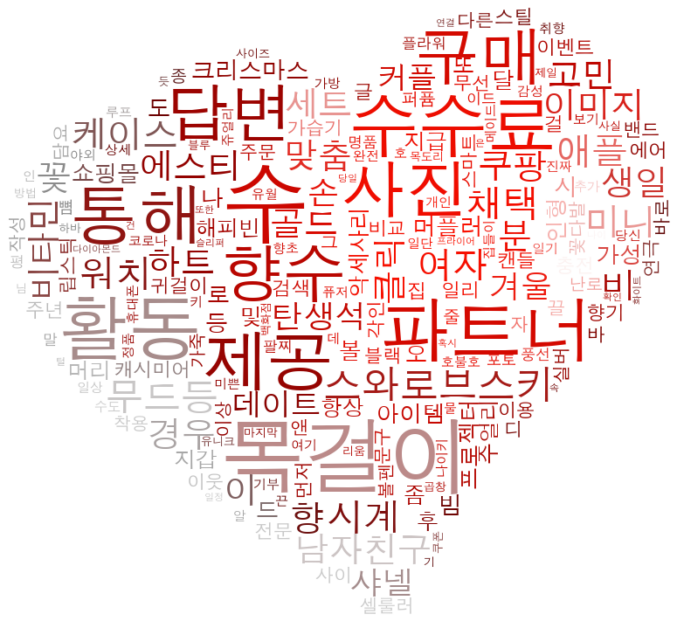

In [20]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()